<a href="https://colab.research.google.com/github/Jushef/Cryptocurrency/blob/main/Analisis%20Tecnico/Cripto_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Datos Cripto con ccxt***

In [12]:
pip install yfinance


     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 62 kB 712 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [13]:
pip install ccxt

     |████████████████████████████████| 2.3 MB 4.4 MB/s 
     |████████████████████████████████| 3.6 MB 40.6 MB/s 
     |████████████████████████████████| 1.1 MB 36.8 MB/s 
     |████████████████████████████████| 271 kB 57.7 MB/s 
     |████████████████████████████████| 160 kB 52.0 MB/s 
     |████████████████████████████████| 291 kB 59.2 MB/s 
     |████████████████████████████████| 192 kB 57.8 MB/s 


In [15]:
import ccxt, yfinance
import pandas as pd

In [20]:
exchange = ccxt.binance()

bars = exchange.fetch_ohlcv('ETH/USDT', timeframe='5m', limit=500)

df = pd.DataFrame(bars, columns=['time', 'open', 'high', 'low', 'close', 'volume'])

* Datos sacados del exchenge de Binance cada 5 Minutos

In [21]:
df.head(10)

,time,open,high,low,close,volume
0,1641009300000,3728.41,3728.76,3722.83,3723.96,349.7962
1,1641009600000,3723.96,3727.14,3723.50,3726.39,331.3446
2,1641009900000,3726.39,3728.07,3723.61,3725.19,236.3776
3,1641010200000,3725.19,3725.19,3710.88,3713.05,868.7790
4,1641010500000,3713.05,3717.79,3712.14,3714.39,702.9590
5,1641010800000,3714.38,3719.60,3711.99,3714.65,944.1702
6,1641011100000,3714.29,3719.22,3714.26,3716.20,519.7899
7,1641011400000,3716.20,3717.31,3712.80,3713.36,256.8242
8,1641011700000,3713.36,3715.31,3708.60,3714.55,766.1022
9,1641012000000,3714.54,3717.94,3712.56,3715.04,342.1679


## ***Analisis Tecnico con pandas-ta***

In [22]:
pip install pandas-ta

     |████████████████████████████████| 115 kB 4.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=7dd2ff3b93e2a075b651417c0e003a46ae2ff404a5b86bfbcf24e9e02427afd6
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [24]:
import pandas_ta as ta

In [27]:
#adx= ta.adx(df['high'], df['low'), df['close']) 

adx = df.ta.adx()
adx

,ADX_14,DMP_14,DMN_14
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
495,16.327917,24.755933,12.971011
496,17.392881,22.944252,12.021770
497,18.086892,21.601345,12.387340
498,18.770566,20.827789,11.802730


* ADX significa índice de dirección media. Es común utilizarlo junto con los indicadores direccionales de movimiento (DMI), que nos muestran la tendencia predominante del mercado.

In [26]:
macd = df.ta.macd(fast=14, slow=28)
macd

,MACD_14_28_9,MACDh_14_28_9,MACDs_14_28_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
495,2.280316,0.896725,1.383591
496,2.515297,0.905365,1.609932
497,2.576210,0.773022,1.803188
498,2.532797,0.583688,1.949110


* El indicador MACD o media móvil de convergencia/divergencia es un indicador de análisis técnico usado para identificar cambios en el impulso del precio de una acción. El indicador MACD recoge información de diferentes medias móviles y, así, ayuda a identificar posibles oportunidades de inversión cercanas a los niveles de soporte y resistencia.

In [28]:
rsi = df.ta.rsi()
rsi

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
495    60.350269
496    56.614975
497    55.055817
498    54.010704
499    54.203199
Name: RSI_14, Length: 500, dtype: float64

* El RSI es un indicador de tipo oscilador que refleja la fuerza relativa de los movimientos alcistas, en comparación con los movimientos bajistas. Es utilizado por los traders para medir la fuerza de una tendencia e identificar señales de fin de tendencia.

In [29]:
df_comp = pd.concat([df, adx, macd, rsi], axis=1)
df_comp.head(10)

,time,open,high,low,close,volume,ADX_14,DMP_14,DMN_14,MACD_14_28_9,MACDh_14_28_9,MACDs_14_28_9,RSI_14
0,1641009300000,3728.41,3728.76,3722.83,3723.96,349.7962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1641009600000,3723.96,3727.14,3723.50,3726.39,331.3446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1641009900000,3726.39,3728.07,3723.61,3725.19,236.3776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1641010200000,3725.19,3725.19,3710.88,3713.05,868.7790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1641010500000,3713.05,3717.79,3712.14,3714.39,702.9590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1641010800000,3714.38,3719.60,3711.99,3714.65,944.1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1641011100000,3714.29,3719.22,3714.26,3716.20,519.7899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1641011400000,3716.20,3717.31,3712.80,3713.36,256.8242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1641011700000,3713.36,3715.31,3708.60,3714.55,766.1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1641012000000,3714.54,3717.94,3712.56,3715.04,342.1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rsi_compra = df_comp[df_comp['RSI_14'] < 30]
rsi_compra.head()

,time,open,high,low,close,volume,ADX_14,DMP_14,DMN_14,MACD_14_28_9,MACDh_14_28_9,MACDs_14_28_9,RSI_14
14,1641013500000,3706.88,3706.88,3702.84,3704.38,294.0948,NaN,11.298657,37.057234,NaN,NaN,NaN,27.383518
79,1641033000000,3691.22,3691.23,3673.46,3676.92,2049.4841,17.755760,13.012460,41.194500,-4.651286,-3.280673,-1.370613,26.016588
299,1641099000000,3727.99,3729.76,3717.30,3720.69,1053.1139,17.308486,13.621101,42.743112,-3.256842,-2.673609,-0.583232,27.410711


* Oportunidad de compra

In [32]:
rsi_venta = df_comp[df_comp['RSI_14'] > 70]
rsi_venta.head()

,time,open,high,low,close,volume,ADX_14,DMP_14,DMN_14,MACD_14_28_9,MACDh_14_28_9,MACDs_14_28_9,RSI_14
17,1641014400000,3715.17,3753.52,3715.17,3753.42,2253.0311,NaN,51.859123,17.288364,NaN,NaN,NaN,75.111876
18,1641014700000,3753.43,3758.00,3745.78,3750.69,1772.9313,NaN,50.052092,15.232779,NaN,NaN,NaN,72.179328
19,1641015000000,3750.68,3765.27,3750.68,3758.51,1240.6783,NaN,50.022462,13.212806,NaN,NaN,NaN,75.169835
20,1641015300000,3758.50,3761.85,3752.81,3754.50,728.3486,NaN,45.956089,12.138724,NaN,NaN,NaN,70.957729
139,1641051000000,3713.17,3742.73,3712.09,3737.76,2344.3831,16.26882,38.707538,14.620368,1.56392,2.17647,-0.61255,72.357358


* Oportunidad de venta

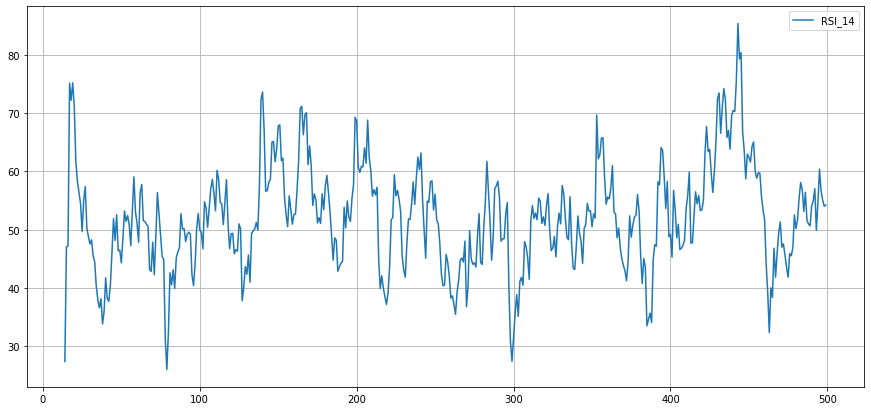

In [36]:
df_comp.RSI_14.plot(figsize=(15,7), grid= True, legend= True)